1 Import Bibliotek

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2 lista kodów prodóktów o których zostało pobrane opinie

In [8]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")],sep="\n")

84514582


#wczytanie opinii o wskazanym produkcie

In [10]:
product_id = input("podaj kod produktu z Ceneo: ")
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r: r.split("/")[0].replace(",",".")).astype(float)

In [11]:
opinions_cont=opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.pros.astype(bool).sum()
average_rating = opinions.rating.mean()
average_rating

4.377906976744186

historia ocen prodóktów

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


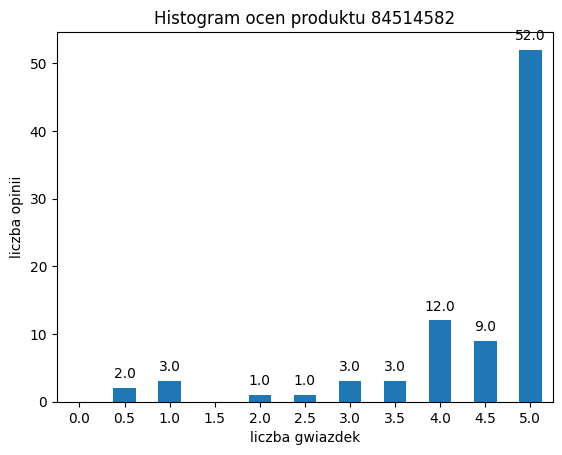

In [12]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5))
rating_distribution.plot.bar()
plt.title(f"Histogram ocen produktu {product_id}")
plt.xlabel("liczba gwiazdek")
plt.ylabel("liczba opinii")
plt.xticks(rotation=0)

for index, value in enumerate(rating_distribution):
    plt.text(index, value+1.5, str(value), ha=("center"))

wykres udziału rekomendacji

In [15]:
recomendation_distributions = opinions.recomendation.value_counts(dropna=False).reindex(["polecam","nie mam zdania"])
recomendation_distributions.plot.pie(
    label = "",
    autopct = lambda r: f"{r:1.1f}%" if r>0 else "",
    labels = ["polecam","nie polecam","nie mam zdania"],
    colors = ["green","crimson","grey"]
)
plt.title(f"udział rekomendacji w opiniach o produkcie {product_id}")


c:\Users\s-013-22\Desktop\CeneoScraper\.venv\Lib\site-packages\matplotlib\axes\_axes.py:3290: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [14]:
stats = {
    "product_id": product_id,
    "opinions_count": opinions_cont,
    "pros_count": int(pros_count),
    "cons_count": int(cons_count),
    "average_rating": average_rating,
    "rating_distribution": rating_distribution,
    "recomendation_distributions":recomendation_distributions
    
}

In [16]:
if not os.path.exists("stats"):
    os.mkdir("stats") 
with open(f"stats/{product_id}.json","w", encoding="UTF-8") as  jf:
    json.dump(stats,jf,indent=4,ensure_ascii=False)

NameError: name 'json' is not defined